In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("new_vehicle")

In [3]:
df.shape

(333648, 17)

In [4]:
df.isna().sum()

Unnamed: 0           0
region               0
price                0
manufacturer     10763
model             2554
condition       143551
cylinders       148398
fuel              2695
odometer          3730
title_status      7116
transmission      2211
drive           102034
type             63650
paint_color      98992
state                0
posting_date        68
car_age           1205
dtype: int64

In [5]:
df.drop("Unnamed: 0",axis=1,inplace=True)

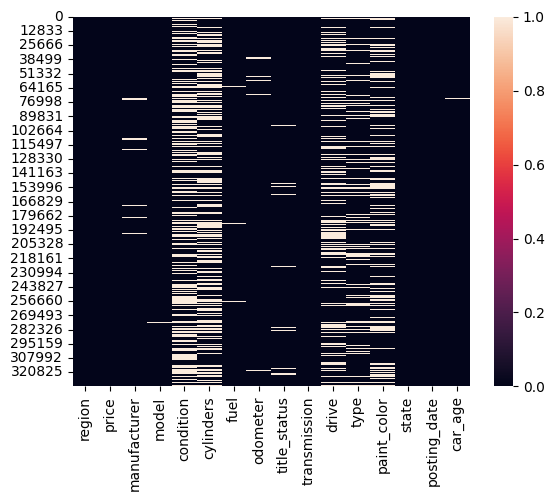

In [6]:
sns.heatmap(df.isnull())
plt.show()

In [7]:
# df['model','fuel','odometer','title_status','transmission','posting_date','car_age'].isnull().sum(axis=1)

In [8]:
# df.dropna(subset=['model','fuel','odometer','title_status','transmission','posting_date','car_age'],axis=0,inplace=True)
df.head()

,region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,posting_date,car_age
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN


In [9]:
df.isna().sum()

region               0
price                0
manufacturer     10763
model             2554
condition       143551
cylinders       148398
fuel              2695
odometer          3730
title_status      7116
transmission      2211
drive           102034
type             63650
paint_color      98992
state                0
posting_date        68
car_age           1205
dtype: int64

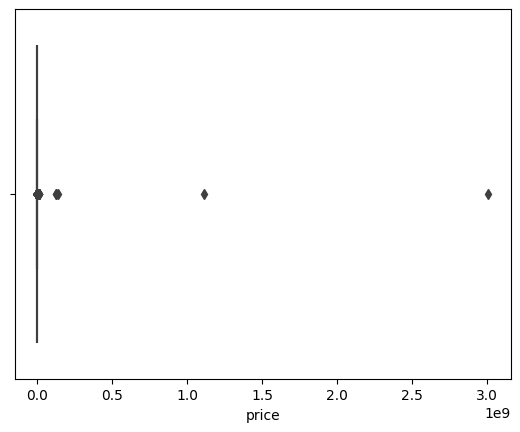

In [10]:
sns.boxplot(x= df['price'])
plt.show()

In [11]:
df['price'].describe()

count    3.336480e+05
mean     3.362270e+04
std      5.567346e+06
min      0.000000e+00
25%      7.995000e+03
50%      1.699500e+04
75%      2.899900e+04
max      3.009549e+09
Name: price, dtype: float64

In [12]:
q3 = 2.959000e+04 
q1 = 8.000000e+03
iqr = q3 -q1
iqr

21590.0

In [13]:
limit_up = q3 + 1.5*iqr
limit_up

61975.0

In [14]:
df = df[df['price']<limit_up]

In [15]:
df.shape

(328138, 16)

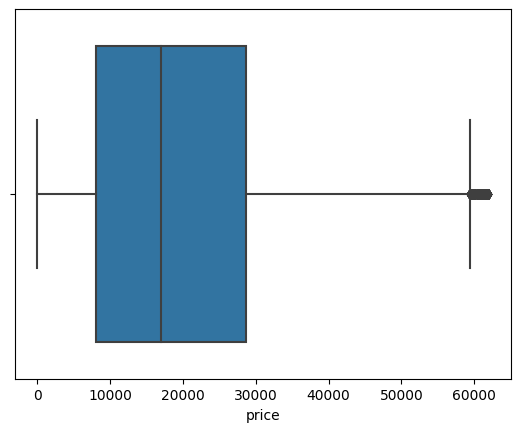

In [16]:
sns.boxplot(x= df['price'])
plt.show()

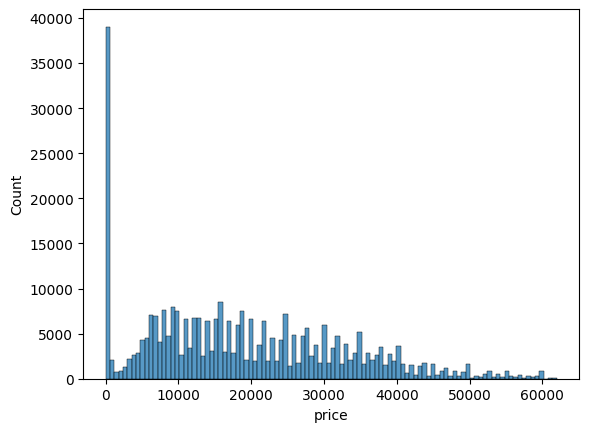

In [17]:
sns.histplot(df["price"])
plt.show()

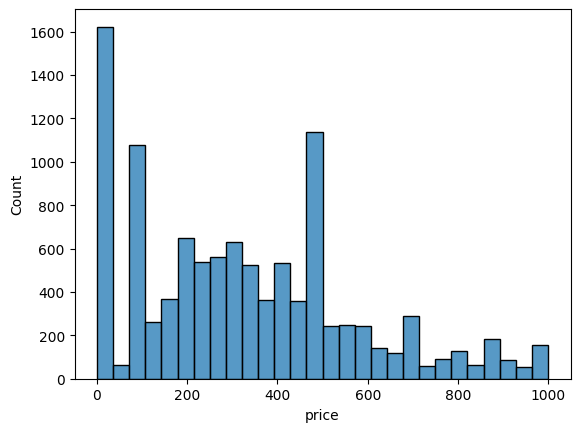

In [18]:
x = df[df["price"]<1000]
x = x[x['price']>0]
sns.histplot(x["price"])
plt.show()

In [19]:
df = df[df['price']>1000]

In [20]:
df.shape

(287049, 16)

In [21]:
df.isna().sum()

region               0
price                0
manufacturer      8192
model             1655
condition       111894
cylinders       125646
fuel              2278
odometer          1629
title_status      5334
transmission      1513
drive            87555
type             52796
paint_color      78411
state                0
posting_date        59
car_age           1011
dtype: int64

In [22]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'state', 'posting_date', 'car_age'],
      dtype='object')

In [23]:
df['paint_color'].unique()

array([nan, 'white', 'blue', 'red', 'black', 'silver', 'grey', 'brown',
       'yellow', 'orange', 'green', 'custom', 'purple'], dtype=object)

In [24]:
df.corr()

/tmp/ipykernel_4509/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,price,odometer,car_age
price,1.000000,-0.317064,-0.601448
odometer,-0.317064,1.000000,0.424333
car_age,-0.601448,0.424333,1.000000


In [25]:
df.dropna(subset=['manufacturer','model','cylinders','fuel','odometer','drive','transmission','paint_color'],thresh=7,inplace=True)

In [26]:
df.shape

(194381, 16)

In [27]:
df.isna().sum()

region              0
price               0
manufacturer     3137
model             416
condition       61628
cylinders       43690
fuel              685
odometer          619
title_status     2130
transmission        9
drive           15803
type            16365
paint_color     17971
state               0
posting_date        0
car_age           516
dtype: int64

In [28]:
df['cylinders'] = df.groupby('model')['cylinders'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))

In [29]:
df.isna().sum()

region              0
price               0
manufacturer     3137
model             416
condition       61628
cylinders       14329
fuel              685
odometer          619
title_status     2130
transmission        9
drive           15803
type            16365
paint_color     17971
state               0
posting_date        0
car_age           516
dtype: int64

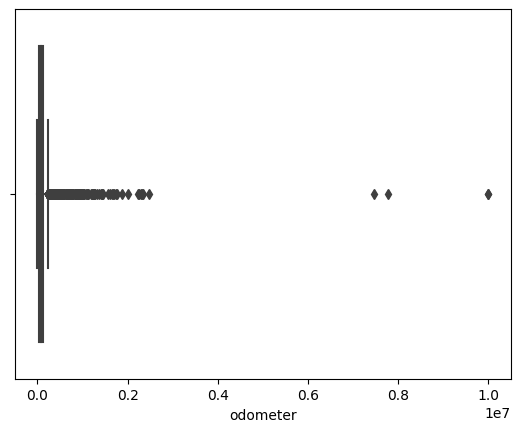

In [30]:
sns.boxplot(x=df['odometer'])
plt.show()

In [31]:
df['odometer'].describe()

count    1.937620e+05
mean     8.197927e+04
std      7.279452e+04
min      0.000000e+00
25%      3.442500e+04
50%      7.588700e+04
75%      1.186308e+05
max      1.000000e+07
Name: odometer, dtype: float64

In [32]:
q3 = 1.179095e+05
q1 = 3.228700e+04
iqr = q3 - q1
iqr

85622.5

In [33]:
up = q3 + 1.5*iqr
low = q1 - 1.5*iqr
print(up,low)

246343.25 -96146.75


In [34]:
df = df[df['odometer']<up]

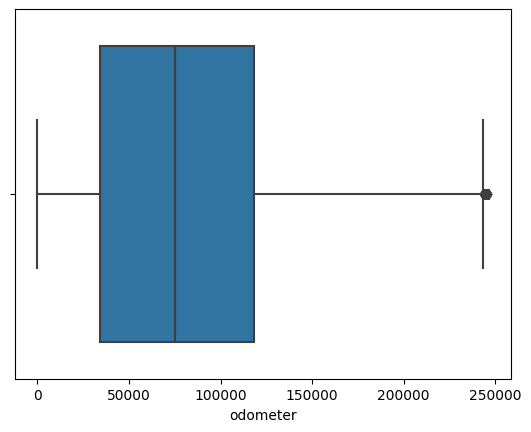

In [35]:
sns.boxplot(x=df['odometer'])
plt.show()

In [36]:
df.isna().sum()

region              0
price               0
manufacturer     3018
model             411
condition       61393
cylinders       14306
fuel              685
odometer            0
title_status     2123
transmission        9
drive           15753
type            16158
paint_color     17866
state               0
posting_date        0
car_age           516
dtype: int64

In [37]:
# df['manufacturer'] = df.groupby('model')['manufacturer'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))

In [38]:
df.isna().sum()

region              0
price               0
manufacturer     3018
model             411
condition       61393
cylinders       14306
fuel              685
odometer            0
title_status     2123
transmission        9
drive           15753
type            16158
paint_color     17866
state               0
posting_date        0
car_age           516
dtype: int64

In [39]:
df['type'] = df.groupby('model')['type'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))

In [40]:
df.isna().sum()

region              0
price               0
manufacturer     3018
model             411
condition       61393
cylinders       14306
fuel              685
odometer            0
title_status     2123
transmission        9
drive           15753
type             1632
paint_color     17866
state               0
posting_date        0
car_age           516
dtype: int64

In [41]:
df.shape

(192694, 16)

In [42]:
df['paint_color'] = df.groupby('model')['paint_color'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))

In [43]:
df["car_age"].mean()

7.49879278585478

In [44]:
df.isna().sum()

region              0
price               0
manufacturer     3018
model             411
condition       61393
cylinders       14306
fuel              685
odometer            0
title_status     2123
transmission        9
drive           15753
type             1632
paint_color      2501
state               0
posting_date        0
car_age           516
dtype: int64

In [45]:
df['car_age'] = df['car_age'].fillna(value=df["car_age"].mean())
df['transmission'] = df['transmission'].fillna(value=df["transmission"].mode()[0])
df['fuel'] = df['fuel'].fillna(value=df["fuel"].mode()[0])
df['type'] = df['type'].fillna(value=df["type"].mode()[0])
df['title_status'] = df['title_status'].fillna(value=df["title_status"].mode()[0])

In [46]:
df['paint_color'] = df['paint_color'].fillna(value=df['paint_color'].mode()[0])

In [47]:
df['condition'].value_counts()

good         64759
excellent    52669
like new     12515
fair           713
new            517
salvage        128
Name: condition, dtype: int64

In [48]:
df['condition'] = df['condition'].fillna(df['condition'].mode()[0])

In [49]:
x =df[df['model'].isna()]

In [50]:
x['manufacturer'].value_counts()

rover              71
ram                57
ford               51
chevrolet          33
bmw                26
toyota             23
mercedes-benz      20
gmc                17
dodge              12
jeep               11
hyundai            11
nissan             10
subaru              9
volkswagen          8
honda               7
audi                5
infiniti            5
lexus               5
volvo               4
harley-davidson     3
chrysler            3
cadillac            3
mitsubishi          3
kia                 2
mazda               2
pontiac             2
lincoln             1
porsche             1
jaguar              1
fiat                1
buick               1
acura               1
mini                1
tesla               1
Name: manufacturer, dtype: int64

In [51]:
df.dropna(subset=['model'],inplace=True)

In [52]:
df['cylinders'].value_counts()

6 cylinders     67977
4 cylinders     63135
8 cylinders     44479
5 cylinders       888
other             865
10 cylinders      564
3 cylinders       466
12 cylinders       14
Name: cylinders, dtype: int64

In [53]:
df['drive'].value_counts()

4wd    78425
fwd    67788
rwd    30317
Name: drive, dtype: int64

In [54]:
df['drive'] = df['drive'].fillna(value=df["drive"].mode()[0])
df['cylinders'] = df['cylinders'].fillna(value=df["cylinders"].mode()[0])

In [55]:
x = df[df['manufacturer'].isna()]

In [56]:
x["model"].value_counts()

Genesis G80 3.8 Sedan 4D    74
International 4300          68
International TerraStar     68
Scion xB                    50
500                         50
                            ..
Mercedies Benz CLA250        1
2013 Equinox                 1
1500                         1
accura mdx                   1
2.0 liter turbo              1
Name: model, Length: 1153, dtype: int64

In [57]:
df.dropna(subset=['manufacturer'],inplace=True)

In [58]:
df.isna().sum()

region          0
price           0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
posting_date    0
car_age         0
dtype: int64

In [59]:
df.shape

(189265, 16)

In [60]:
df.drop(['posting_date','state'],axis=1,inplace=True)

In [61]:
df.head()

,region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,car_age
27,auburn,33590,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,4wd,pickup,white,8.0
28,auburn,22590,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,4wd,pickup,blue,12.0
29,auburn,39590,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,4wd,pickup,red,2.0
30,auburn,30990,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,4wd,pickup,red,5.0
31,auburn,15000,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,9.0


In [62]:
df['condition'].unique()

array(['good', 'excellent', 'like new', 'new', 'fair', 'salvage'],
      dtype=object)

In [63]:
df['cylinders'].unique()

array(['8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders',
       '10 cylinders', 'other', '3 cylinders', '12 cylinders'],
      dtype=object)

In [64]:
z = df['model'].value_counts().to_frame().reset_index()
z.rename({'index':'model','model':'counts'},inplace=True,axis=1)
z.columns

Index(['model', 'counts'], dtype='object')

In [65]:
df['fuel'].unique()

array(['gas', 'other', 'diesel', 'hybrid', 'electric'], dtype=object)

In [68]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'car_age'],
      dtype='object')

In [69]:
cat_var = ['region', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'title_status', 'transmission', 'drive', 'type',
       'paint_color']

In [70]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
classes_and_values = {}
for col in cat_var:
    df[col]=encoder.fit_transform(df[col])
    classes = encoder.classes_
    assigned_values = encoder.transform(classes)

    # Store the classes and their assigned values in the dictionary
    classes_and_values[col] = dict(zip(classes, assigned_values))



for column, values in classes_and_values.items():
    print(f"Column: {column}")
    for label, value in values.items():
        print(f"Label: {label}, Assigned Value: {value}")
    print()

Column: region
Label: SF bay area, Assigned Value: 0
Label: abilene, Assigned Value: 1
Label: akron / canton, Assigned Value: 2
Label: albany, Assigned Value: 3
Label: albuquerque, Assigned Value: 4
Label: altoona-johnstown, Assigned Value: 5
Label: amarillo, Assigned Value: 6
Label: ames, Assigned Value: 7
Label: anchorage / mat-su, Assigned Value: 8
Label: ann arbor, Assigned Value: 9
Label: annapolis, Assigned Value: 10
Label: appleton-oshkosh-FDL, Assigned Value: 11
Label: asheville, Assigned Value: 12
Label: ashtabula, Assigned Value: 13
Label: athens, Assigned Value: 14
Label: atlanta, Assigned Value: 15
Label: auburn, Assigned Value: 16
Label: augusta, Assigned Value: 17
Label: austin, Assigned Value: 18
Label: bakersfield, Assigned Value: 19
Label: baltimore, Assigned Value: 20
Label: baton rouge, Assigned Value: 21
Label: battle creek, Assigned Value: 22
Label: beaumont / port arthur, Assigned Value: 23
Label: bellingham, Assigned Value: 24
Label: bemidji, Assigned Value: 25
L

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# model = LabelEncoder()

# df['region']= model.fit_transform(df['region'])
# df['manufacturer']= model.fit_transform(df['manufacturer'])
# df['model']= model.fit_transform(df['model'])
# df['condition']= model.fit_transform(df['condition'])
# df['cylinders']= model.fit_transform(df['cylinders'])
# df['fuel']= model.fit_transform(df['fuel'])
# df['title_status']= model.fit_transform(df['title_status'])
# df['transmission']= model.fit_transform(df['transmission'])
# df['drive']= model.fit_transform(df['drive'])
# df['type']= model.fit_transform(df['type'])
# df['paint_color']= model.fit_transform(df['paint_color'])

In [ ]:
df.head()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled,columns=df.columns)

In [ ]:
scaled_df.corr()

In [ ]:
sns.boxplot(x=scaled_df['transmission'])

In [ ]:
scaled_df.columns

In [ ]:
cols = ['region', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'car_age']

for i in cols:
    if abs(np.corrcoef(scaled_df['price'],scaled_df[i])[0][1]) < 0.06:
        scaled_df.drop(i,axis=1,inplace=True)

In [ ]:
scaled_df.shape

In [ ]:
scaled_df.columns

In [ ]:
sns.boxplot(x=df['transmission'])
plt.show()

In [ ]:
sns.boxplot(x=df['title_status'])
plt.show()

In [ ]:
scaled_df.drop(["transmission"],axis=1,inplace=True)

In [ ]:
scaled_df.columns

In [ ]:
x = scaled_df.drop('price',axis=1)
y = scaled_df['price']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=.75)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

In [ ]:
y_pred = model.predict(x_test)
y_true = y_test

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_true,y_pred)
r2

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=15)
model.fit(x_train,y_train)


In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2d = r2_score(y_true,y_pred)
r2d

In [ ]:
import pickle5 as pickle

# open the file to write the contents of model
file = open("Decision_Tree.pkl", "wb")

# serialize the model to the file
pickle.dump(model,file)

# close the file
file.close()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=15)
model.fit(x_train,y_train)

In [ ]:
y_pred = model.predict(x_test)
from sklearn.metrics import r2_score
r2x = r2_score(y_true,y_pred)
r2x

In [ ]:
import pickle5 as pickle

# open the file to write the contents of model
file = open("Random_forest.pkl", "wb")

# serialize the model to the file
pickle.dump(model,file)

# close the file
file.close()

In [ ]:
from sklearn.ensemble import BaggingRegressor
model = BaggingRegressor()
model.fit(x_train,y_train)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2x = r2_score(y_true,y_pred)
r2x

In [ ]:
from xgboost import XGBRFRegressor
model = XGBRFRegressor()
model.fit(x_train,y_train)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2x = r2_score(y_true,y_pred)
r2x

In [ ]:
scaled_df.info()